<a href="https://colab.research.google.com/github/coyens/Python/blob/master/Biedronka_webscraping_ver_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###BIEDRONKA 



W źródle danych występują braki w opisie miasta, takie rekordy zostaną odfiltrowane przed zapisem i przekazaniem do geokodowania.






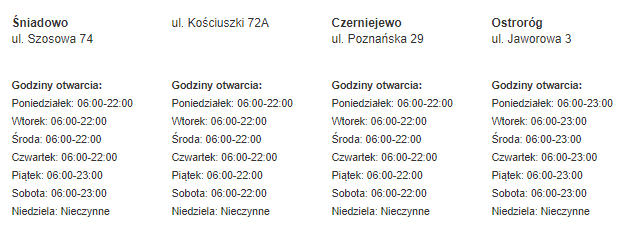

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date
import time
from itertools import chain
import numpy as np
import re


today = date.today()
dzisiaj = today.strftime("%Y-%m-%d")



In [3]:
# Zrzut danych Biedronka i generowanie plików do zapisu - może potrwać kilka minuy

#URL bazowe
biedronka_url="https://www.biedronka.pl/pl/sklepy/lista,city,,page,"

# <DO EDYCJI> obecnie jest 157, warto dać więcej, by niczego nie uciąć.
count_urls = 200

# generuje linki z określeniem numeru podstrony
generated_urls = list([f"{biedronka_url}{pnum}" for pnum in range(1, count_urls)])


city_list =[]
street_list = []
city_list_clean =[]

for page in generated_urls:
  d={}
  r=requests.get(page)
  c=r.content
  soup=BeautifulSoup(c,"html.parser")
  # zrzut adresów
  find_street =soup.find_all("span",{"class":"shopAddress"})
  street_list.append(find_street)
  # zrzut miasta
  find_city = soup.find_all("h4",{"style":"margin-bottom: 10px;"})
  city_list.append(find_city)
# łączenie list
city_list = list(chain(*city_list))   
street_list = list(chain(*street_list))   
city_df = pd.DataFrame(city_list)
street_df = pd.DataFrame(street_list)
# eliminacja białych znaków z DF
for i in city_df[0]:
  a =' '.join(i.split())
  city_list_clean.append(a)
# tworzenie DF wynikowego
city_df_clean = pd.DataFrame(city_list_clean)
biedronka_data = pd.concat([city_df_clean, street_df], ignore_index=False, axis=1, join="inner")
biedronka_data.columns =['city', 'street'] 
biedronka_data['address'] =  biedronka_data['city']+", "+ biedronka_data['street']
biedronka_data = biedronka_data.drop_duplicates()
# ignoruje ostrzeżenie
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
print("Zrzut danych ze strony zakończony pomyślnie, pobrano " + str(len(biedronka_data)) +" obiektów.")




Zrzut danych ze strony zakończony pomyślnie, pobrano 3128 obiektów.


Zapis danych do pliku '.xlsx'

In [33]:
#Tutaj możesz zmienić nazwę pliku
nazwa_pliku = 'Biedronka2 '

biedronka_data_filter = biedronka_data.dropna()
biedronka_data_filter= biedronka_data[(biedronka_data['city']!="")&(biedronka_data['street']!="")]


biedronka_data_filter.to_excel(nazwa_pliku + dzisiaj + ' (' + str(len(biedronka_data_filter)) + ')' +  '.xlsx', index = False)
print("Liczba wyfiltrowanych niepełnych adresów " + (str((len(biedronka_data)) - (len(biedronka_data_filter)))))

Liczba wyfiltrowanych niepełnych adresów 4
